# Project Title: Classification of Consumer Data into {Segments | Clusters | Classes} using Cross-Validation and Ensemble Methods 

## Project Objectives | Problem Statements
1. Classification of Consumer Data into {Segments | Clusters | Classes} using Cross-Validation
2. Classification of Consumer Data into {Segments | Clusters | Classes} using Ensemble Methods
3. Determination of an Appropriate Classification Model (Default vs Cross-Validation or Ensemble)
4. Identification of Important | Contributing | Significant Variables or Features and their Thresholds for Classification 

## Observations : 
### 1. Classification of Consumer Data into {Segments | Clusters | Classes} using K fold
When both the Random Forest model and k-fold cross-validation attain perfect accuracy on the testing subset, it is necessary to take into account a number of criteria to determine which approach is superior. Through its decision tree component, Random Forest enables interpretability, making it simple to grasp the decision-making process, and k-fold cross-validation delivers insights into the overall performance of the model. For big datasets, in particular, k-fold cross-validation can be computationally costly, while Random Forest models usually provide quicker predictions after training. Additionally, Random Forest is scalable and effective for high-dimensional datasets, while k-fold cross-validation offers a reliable estimate of model generalisation. The decision between the two approaches ultimately comes down to particular requirements in terms of scalability, generalisation, computing efficiency, and interpretability.

### 2. Classification of Consumer Data into {Segments | Clusters | Classes} using Random Forsest
As part of an ensemble learning technique called Random Forest, many decision trees are constructed during training, and their predictions are combined to increase accuracy and decrease overfitting. A random subset of characteristics is taken into consideration at each split, and each tree is trained using a bootstrap sampling of the training data. Random Forest delivers strong performance on a variety of datasets by reducing variation through the aggregation of predictions from several trees. It is well-known for being scalable, capable of handling high-dimensional data, and appropriate for jobs involving both regression and classification.

### 3. Random Forest vs K fold
When both the Random Forest model and k-fold cross-validation attain perfect accuracy on the testing subset, it is necessary to take into account a number of criteria to determine which approach is superior. Through its decision tree component, Random Forest enables interpretability, making it simple to grasp the decision-making process, and k-fold cross-validation delivers insights into the overall performance of the model. For big datasets, in particular, k-fold cross-validation can be computationally costly, while Random Forest models usually provide quicker predictions after training. Additionally, Random Forest is scalable and effective for high-dimensional datasets, while k-fold cross-validation offers a reliable estimate of model generalisation. The decision between the two approaches ultimately comes down to particular requirements in terms of scalability, generalisation, computing efficiency, and interpretability.

### 4. Feature Selection
With corresponding relevance values of 0.582, 0.324, and 0.059, the Light Conditions code, Road Type code, and Speed restriction are the most significant features in the Random Forest model. The model's predictions are greatly influenced by these characteristics. However, in the k-fold cross-validation, the remaining attributes are of minor consequence (0.0), with the exception of the Light Conditions and Road Type codes, which have values of 0.565 and 0.435, respectively. This disparity shows that the Random Forest model could have found more subtleties in the dataset than the k-fold cross-validation method might have.

## Results :
1.It seems from the findings that the Random Forest model performs better than the k-fold cross-validation method.In this case, Random Forest is thought to be superior because of its increased accuracy, resilience to overfitting, and capacity to recognise pertinent traits. Random Forest minimises overfitting and enhances generalisation performance by combining predictions from several decision trees trained on various subsets of data.

2.In comparison to the features found in the k-fold cross-validation, the Random Forest model gets higher feature significance values for the Road Type code, Speed limit, and Light Conditions code, indicating that these characteristics have a greater influence on the model's predictions. Because it can better collect and use the significance of pertinent variables, the Random Forest model could be superior in this situation. Consequently, the Random Forest model, which produces the best results, determines that the attributes Light Conditions code, Road Type code, and Speed restriction are significant.

## Managerial Insights :

1.Random Forest works better than Decision tree.
2.Road Type code, Speed limit, and Light Conditions code are the most crucial elements.

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import datetime as dt

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets


In [2]:

df = pd.read_csv('Road Accident Data.csv')

In [3]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,None,...,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,201091NM01881,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,None,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,201091NM01935,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,None,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,201091NM01964,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,None,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
df1 = pd.read_csv('adjusted_cluster_subset.csv')

In [5]:
df1

,cluster_number
0,2
1,0
2,0
3,0
4,1
...,...
307968,0
307969,0
307970,0
307971,0


In [6]:
import pandas as pd

# Assuming df and df1 are your DataFrames
# Merging on index
merged_df = pd.merge(df, df1, left_index=True, right_index=True)


In [7]:
merged_df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,cluster_number
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,2
1,200901BS70002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car,0
2,200901BS70003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,0
3,200901BS70004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc,0
4,200901BS70005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,None,...,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car,0
307969,201091NM01881,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,None,...,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car,0
307970,201091NM01935,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,None,...,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car,0
307971,201091NM01964,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,None,...,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc,0


# 1. Project Objectives | Problem Statements
1.1. PO1 | PS1: Classification of Consumer Data into Segments | Clusters | Classes using Supervised Learning Classification Algorithms
1.2. PO2 | PS2: Determination of an Appropriate Classification Model
1.3. PO3 | PS3: Identification of Important | Contributing | Significant Variables or Features and their Thresholds for Classification


# 2. Description of Data
2.1. Data Source, Size, Shape
2.1.2 Data Size

In [8]:


# Import pandas library
import pandas as pd

# Assuming df is your DataFrame
# If your DataFrame is loaded from a file, you might need to load it first

# Check the memory usage of the DataFrame in bytes
memory_bytes = merged_df.memory_usage().sum()

# Convert bytes to kilobytes (KB), megabytes (MB), gigabytes (GB), etc.
memory_kb = memory_bytes / 1024
memory_mb = memory_kb / 1024
memory_gb = memory_mb / 1024

# Print the memory usage of the DataFrame in various units
print("Memory usage (KB):", memory_kb)
print("Memory usage (MB):", memory_mb)
print("Memory usage (GB):", memory_gb)

Memory usage (KB): 52932.98828125
Memory usage (MB): 51.6923713684082
Memory usage (GB): 0.050480831414461136


2.1.2 Data Shape (Dimension: Number of Variables | Number of Records)

In [9]:


# Import pandas library
import pandas as pd

# Assuming df is your DataFrame
# If your DataFrame is loaded from a file, you might need to load it first

# Check the size of the DataFrame
data_size = merged_df.shape

# Print the size of the DataFrame
print("Number of rows:", data_size[0])
print("Number of columns:", data_size[1])


Number of rows: 307973
Number of columns: 22


# 2.2. Description of Variables
2.2.1. Index Variable(s): I1, I2, …


In [10]:

# Displaying the columns and their descriptions
print("Column Descriptions:")
print(merged_df.columns)

Column Descriptions:
Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type',
       'cluster_number'],
      dtype='object')


2.2.2. Outcome Variable or Feature : Cluster_Number

2.2.3. Input Variables or Features having Categories | Input Categorical Variables or Features (ICV)



In [11]:


# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with object data type (typically categorical)
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Printing the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)



Categorical Columns:
['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']


2.2.3.1. Input Variables or Features having Nominal Categories | Categorical Variables or Features - Nominal Type: ICNV1, ICNV2, …


In [12]:


# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with object data type (typically categorical)
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Removing columns that might be ordinal (ordered categorical)
ordinal_columns = ['Day_of_Week']  # Add other columns if known
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

# Printing the list of nominal columns
print("Nominal Columns:")
print(nominal_columns)




Nominal Columns:
['Accident_Index', 'Accident Date', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']


 2.2.3.2. Input Variables or Features having Ordinal Categories | Categorical Variables or Features - Ordinal Type: ICOV1, ICOV2, …


In [13]:


# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# List of columns that are known to be ordinal
ordinal_columns = ['Day_of_Week']  # Add other columns if known

# Printing the list of ordinal columns
print("Ordinal Columns:")
print(ordinal_columns)



Ordinal Columns:
['Day_of_Week']


2.2.3. Input Non-Categorical Variables or Features: INCV1, INCV2, …


In [14]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with non-object data type (typically numerical)
non_categorical_columns = merged_df.select_dtypes(exclude=['object']).columns.tolist()

# Printing the list of non-categorical columns
print("Non-Categorical Columns:")
print(non_categorical_columns)


Non-Categorical Columns:
['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'cluster_number']


# 2.3. Descriptive Statistics 
2.3.1. Descriptive Statistics: Outcome Variable or Feature (Categorical)
2.3.1.1. Count | Frequency Statistics



2.3.1.2. Proportion (Relative Frequency) Statistics


2.3.2. Descriptive Statistics: Input Categorical Variables or Features
2.3.2.1. Count | Frequency Statistics


In [15]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with object data type (typically categorical)
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Iterating over each categorical column to find frequency statistics
for column in categorical_columns:
    print("Frequency statistics for column:", column)
    print(merged_df[column].value_counts())
    print("\n")


Frequency statistics for column: Accident_Index
2.01E+12         110304
2.01E+46              3
2.01E+307             2
2.01E+199             2
2.01E+48              2
                  ...  
200934NC22759         1
200934NC22829         1
200934NC22889         1
200934NC22899         1
201091NM02142         1
Name: Accident_Index, Length: 197644, dtype: int64


Frequency statistics for column: Accident Date
13-11-2021    692
11-02-2021    685
06-10-2021    680
04-12-2021    667
12-11-2021    659
             ... 
28-12-2022    181
27-12-2022    179
30-12-2022    171
25-12-2022    145
10-01-2022    123
Name: Accident Date, Length: 730, dtype: int64


Frequency statistics for column: Day_of_Week
Friday       50529
Tuesday      46386
Wednesday    46381
Thursday     45649
Monday       43918
Saturday     41566
Sunday       33544
Name: Day_of_Week, dtype: int64


Frequency statistics for column: Junction_Control
Give way or uncontrolled               150045
Data missing or out of range     

2.3.2.2. Proportion (Relative Frequency) Statistics

In [16]:


# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with object data type (typically categorical)
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Iterating over each categorical column to find proportion statistics
for column in categorical_columns:
    print("Proportion statistics for column:", column)
    # Calculating value counts
    value_counts = merged_df[column].value_counts()
    # Calculating proportions
    proportions = value_counts / len(merged_df)
    print(proportions)
    print("\n")



Proportion statistics for column: Accident_Index
2.01E+12         0.358161
2.01E+46         0.000010
2.01E+307        0.000006
2.01E+199        0.000006
2.01E+48         0.000006
                   ...   
200934NC22759    0.000003
200934NC22829    0.000003
200934NC22889    0.000003
200934NC22899    0.000003
201091NM02142    0.000003
Name: Accident_Index, Length: 197644, dtype: float64


Proportion statistics for column: Accident Date
13-11-2021    0.002247
11-02-2021    0.002224
06-10-2021    0.002208
04-12-2021    0.002166
12-11-2021    0.002140
                ...   
28-12-2022    0.000588
27-12-2022    0.000581
30-12-2022    0.000555
25-12-2022    0.000471
10-01-2022    0.000399
Name: Accident Date, Length: 730, dtype: float64


Proportion statistics for column: Day_of_Week
Friday       0.164070
Tuesday      0.150617
Wednesday    0.150601
Thursday     0.148224
Monday       0.142603
Saturday     0.134966
Sunday       0.108919
Name: Day_of_Week, dtype: float64


Proportion statistics 

 2.3.3. Descriptive Statistics: Input Non-Categorical Variables or Features 
2.3.3.1. Measures of Central Tendency


In [17]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with non-object data type (typically numerical)
non_categorical_columns = merged_df.select_dtypes(exclude=['object']).columns.tolist()

# Iterating over each non-categorical column to find measures of central tendency
for column in non_categorical_columns:
    print("Measures of central tendency for column:", column)
    # Calculating mean
    mean_value = merged_df[column].mean()
    print("Mean:", mean_value)

    # Calculating median
    median_value = merged_df[column].median()
    print("Median:", median_value)

    # Calculating mode
    mode_value = merged_df[column].mode()
    print("Mode:", mode_value[0])  # Mode can be multiple, so we select the first one

    print("\n")


Measures of central tendency for column: Latitude
Mean: 52.48700471916694
Median: 52.225943
Mode: 52.458798


Measures of central tendency for column: Longitude
Mean: -1.3688840968006937
Median: -1.349258
Mode: -1.190861


Measures of central tendency for column: Number_of_Casualties
Mean: 1.3568819344552931
Median: 1.0
Mode: 1


Measures of central tendency for column: Number_of_Vehicles
Mean: 1.8290629373354157
Median: 2.0
Mode: 2


Measures of central tendency for column: Speed_limit
Mean: 38.86603695778526
Median: 30.0
Mode: 30


Measures of central tendency for column: cluster_number
Mean: 0.46986261782688743
Median: 0.0
Mode: 0




2.3.3.2. Measures of Dispersion

In [18]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with non-object data type (typically numerical)
numerical_columns = merged_df.select_dtypes(include=['int', 'float']).columns.tolist()

# Iterating over each numerical column to find measures of dispersion
for column in numerical_columns:
    print("Measures of dispersion for column:", column)
    # Calculating range
    data_range = merged_df[column].max() - merged_df[column].min()
    print("Range:", data_range)

    # Calculating variance
    data_variance = merged_df[column].var()
    print("Variance:", data_variance)

    # Calculating standard deviation
    data_std_dev = merged_df[column].std()
    print("Standard Deviation:", data_std_dev)

    # Calculating interquartile range (IQR)
    data_iqr = merged_df[column].quantile(0.75) - merged_df[column].quantile(0.25)
    print("Interquartile Range (IQR):", data_iqr)

    print("\n")


Measures of dispersion for column: Latitude
Range: 10.683567000000004
Variance: 1.7929498148538905
Standard Deviation: 1.339010759797654
Interquartile Range (IQR): 1.9302690000000027


Measures of dispersion for column: Longitude
Range: 9.275623
Variance: 1.8389845054655853
Standard Deviation: 1.35609162871304
Interquartile Range (IQR): 2.041127


Measures of dispersion for column: Number_of_Casualties
Range: 47
Variance: 0.665622545506375
Standard Deviation: 0.8158569393627629
Interquartile Range (IQR): 0.0


Measures of dispersion for column: Number_of_Vehicles
Range: 31
Variance: 0.5047770228218922
Standard Deviation: 0.7104766166608808
Interquartile Range (IQR): 1.0


Measures of dispersion for column: Speed_limit
Range: 60
Variance: 196.92321407967407
Standard Deviation: 14.032933195867287
Interquartile Range (IQR): 20.0


Measures of dispersion for column: cluster_number
Range: 2
Variance: 0.5113111902621877
Standard Deviation: 0.7150602703703988
Interquartile Range (IQR): 1.0




2.3.3.3. Correlation Statistics (with Test of Correlation)


In [19]:
import pandas as pd

# Assuming df is your DataFrame containing the non-categorical data
# Load your dataset into df

non_categorical_data = merged_df[['Latitude','Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit','cluster_number']]

# Summary statistics
summary_statistics = non_categorical_data.describe()
print("Summary Statistics:")
print(summary_statistics)

# Correlation matrix
correlation_matrix = non_categorical_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Summary Statistics:
            Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles  \
count  307973.000000  307973.000000         307973.000000       307973.000000   
mean       52.487005      -1.368884              1.356882            1.829063   
std         1.339011       1.356092              0.815857            0.710477   
min        49.914488      -7.516225              1.000000            1.000000   
25%        51.485248      -2.247937              1.000000            1.000000   
50%        52.225943      -1.349258              1.000000            2.000000   
75%        53.415517      -0.206810              1.000000            2.000000   
max        60.598055       1.759398             48.000000           32.000000   

         Speed_limit  cluster_number  
count  307973.000000   307973.000000  
mean       38.866037        0.469863  
std        14.032933        0.715060  
min        10.000000        0.000000  
25%        30.000000        0.000000  
50%        30.00

 3. Analysis of Data
3.1. Data Pre-Processing
3.1.1. Missing Data Statistics and Treatment
3.1.1.1.1. Missing Data Statistics: Records


In [20]:
# Data Bifurcation
df_cat = merged_df[['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']] # Categorical Data [Nominal | Ordinal]
df_noncat = merged_df[['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit','cluster_number' ]] # Non-Categorical Data

3.1.1.1.2. Missing Data Treatment: Records 
3.1.1.1.2.1. Removal of Records with More Than 50% Missing Data: None | R1, R2, …


In [21]:
df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = merged_df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = merged_df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

87243     3
86364     3
85926     3
245584    3
190949    2
dtype: int64

3.1.1.2.1. Missing Data Statistics: Categorical Variables or Features

In [22]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with object data type (typically categorical)
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Iterating over each categorical column to find missing data statistics
for column in categorical_columns:
    print("Missing data statistics for column:", column)
    missing_data_count = merged_df[column].isnull().sum()
    total_data_count = len(merged_df)
    missing_data_percentage = (missing_data_count / total_data_count) * 100
    print("Total Missing Values:", missing_data_count)
    print("Percentage of Missing Values: {:.2f}%".format(missing_data_percentage))
    print("\n")


Missing data statistics for column: Accident_Index
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Accident Date
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Day_of_Week
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Junction_Control
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Junction_Detail
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Accident_Severity
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Light_Conditions
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Local_Authority_(District)
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Carriageway_Hazards
Total Missing Values: 3


3.1.1.2.2. Missing Data Treatment: Categorical Variables or Features
3.1.1.2.2.1. Removal of Variables or Features with More Than 50% Missing Data: None | CV1, CV2, …


In [23]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with object data type (typically categorical)
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# List to store columns to drop
columns_to_drop = []

# Iterating over each categorical column to find columns with more than 50% missing data
for column in categorical_columns:
    missing_data_count = merged_df[column].isnull().sum()
    total_data_count = len(merged_df)
    missing_data_percentage = (missing_data_count / total_data_count) * 100
    if missing_data_percentage > 50:
        print("Column '{}' has more than 50% missing data ({}%)".format(column, missing_data_percentage))
        columns_to_drop.append(column)

# Dropping columns with more than 50% missing data
df.drop(columns=columns_to_drop, inplace=True)

# Print columns dropped
print("Columns dropped:", columns_to_drop)

# Optional: Print DataFrame info after dropping columns
print(df_cat.info())


Columns dropped: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Accident_Index              307973 non-null  object
 1   Accident Date               307973 non-null  object
 2   Day_of_Week                 307973 non-null  object
 3   Junction_Control            307973 non-null  object
 4   Junction_Detail             307973 non-null  object
 5   Accident_Severity           307973 non-null  object
 6   Light_Conditions            307973 non-null  object
 7   Local_Authority_(District)  307973 non-null  object
 8   Carriageway_Hazards         307970 non-null  object
 9   Police_Force                307973 non-null  object
 10  Road_Surface_Conditions     307656 non-null  object
 11  Road_Type                   306439 non-null  object
 12  Time                        307956 non-null  object
 13  Urban_or_

3.1.1.2.2.2. Imputation of Missing Data using Descriptive Statistics: Mode

In [24]:
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Accident_Index              307973 non-null  object
 1   Accident Date               307973 non-null  object
 2   Day_of_Week                 307973 non-null  object
 3   Junction_Control            307973 non-null  object
 4   Junction_Detail             307973 non-null  object
 5   Accident_Severity           307973 non-null  object
 6   Light_Conditions            307973 non-null  object
 7   Local_Authority_(District)  307973 non-null  object
 8   Carriageway_Hazards         307973 non-null  object
 9   Police_Force                307973 non-null  object
 10  Road_Surface_Conditions     307973 non-null  object
 11  Road_Type                   307973 non-null  object
 12  Time                        307973 non-null  object
 13  Urban_or_Rural_Area         3

3.1.1.3.1. Missing Data Statistics: Non-Categorical Variables or Features

In [25]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with non-object data type (typically numerical)
non_categorical_columns = merged_df.select_dtypes(exclude=['object']).columns.tolist()

# Iterating over each non-categorical column to find missing data statistics
for column in non_categorical_columns:
    print("Missing data statistics for column:", column)
    missing_data_count = merged_df[column].isnull().sum()
    total_data_count = len(merged_df)
    missing_data_percentage = (missing_data_count / total_data_count) * 100
    print("Total Missing Values:", missing_data_count)
    print("Percentage of Missing Values: {:.2f}%".format(missing_data_percentage))
    print("\n")


Missing data statistics for column: Latitude
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Longitude
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Number_of_Casualties
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Number_of_Vehicles
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: Speed_limit
Total Missing Values: 0
Percentage of Missing Values: 0.00%


Missing data statistics for column: cluster_number
Total Missing Values: 0
Percentage of Missing Values: 0.00%




3.1.1.3.2. Missing Data Treatment: Non-Categorical Variables or Features 
3.1.1.3.2.1. Removal of Variables or Features with More Than 50% Missing Data: None | NCV1, NCV2, …
3.1.1.3.2.2. Imputation of Missing Data using Descriptive Statistics: Mean | Median

In [26]:

si_noncat = SimpleImputer(missing_values=np.nan, strategy='median') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Latitude              307973 non-null  float64
 1   Longitude             307973 non-null  float64
 2   Number_of_Casualties  307973 non-null  float64
 3   Number_of_Vehicles    307973 non-null  float64
 4   Speed_limit           307973 non-null  float64
 5   cluster_number        307973 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


3.1.2. Numerical Encoding of Categorical Variables or Features (Encoding Schema - Alphanumeric Order)

In [27]:
df_cat_mdi_code = df_cat_mdi.copy()

In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a LabelEncoder instance
le = LabelEncoder()

# List of categorical variables to be encoded
categorical_variables = ['Junction_Control', 'Junction_Detail', 'Light_Conditions',
                         'Local_Authority_(District)', 'Carriageway_Hazards', 'Police_Force',
                         'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area',
                         'Weather_Conditions', 'Vehicle_Type']

# Initialize an empty DataFrame to store the encoded values
encoded_df = pd.DataFrame()

# Loop through each categorical variable and encode it
for var in categorical_variables:
    # Fit and transform the variable using LabelEncoder
    encoded_var = le.fit_transform(df_cat_mdi_code[var])

    # Create a DataFrame for the encoded variable
    encoded_var_df = pd.DataFrame(encoded_var, columns=[f'{var}_code'])

    # Concatenate the encoded variable DataFrame with the main DataFrame
    encoded_df = pd.concat([encoded_df, encoded_var_df], axis=1)

# Concatenate the original DataFrame with the encoded variables
df_cat_mdt_code_le = pd.concat([df_cat_mdi_code, encoded_df], axis=1)

# Now df_cat_mdt_code_le contains the original DataFrame with the categorical variables encoded




In [29]:
print(df_cat_mdt_code_le)

       Accident_Index Accident Date Day_of_Week              Junction_Control  \
0       200901BS70001    01-01-2021    Thursday      Give way or uncontrolled   
1       200901BS70002    05-01-2021      Monday      Give way or uncontrolled   
2       200901BS70003    04-01-2021      Sunday      Give way or uncontrolled   
3       200901BS70004    05-01-2021      Monday           Auto traffic signal   
4       200901BS70005    06-01-2021     Tuesday           Auto traffic signal   
...               ...           ...         ...                           ...   
307968  201091NM01760    18-02-2022    Thursday  Data missing or out of range   
307969  201091NM01881    21-02-2022      Sunday  Data missing or out of range   
307970  201091NM01935    23-02-2022     Tuesday      Give way or uncontrolled   
307971  201091NM01964    23-02-2022     Tuesday      Give way or uncontrolled   
307972  201091NM02142    28-02-2022      Sunday      Give way or uncontrolled   

                           

In [30]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an OrdinalEncoder instance
oe = OrdinalEncoder()

# List of categorical variables to be encoded
categorical_variables = ['Day_of_Week', 'Accident_Severity']

# Fit and transform the categorical variables using OrdinalEncoder
oe_fit = oe.fit_transform(df_cat_mdi_code[categorical_variables])

# Create a DataFrame for the encoded variables
encoded_variables = [var + '_code' for var in categorical_variables]
df_cat_code_oe = pd.DataFrame(oe_fit, columns=encoded_variables)

# Concatenate the original DataFrame with the encoded variables
df_cat_mdi_code_oe = pd.concat([df_cat_mdi_code, df_cat_code_oe], axis=1)

# Now df_cat_mdi_code_oe contains the original DataFrame with the categorical variables encoded


In [31]:
df_cat_mdi_code_oe

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day_of_Week_code,Accident_Severity_code
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,None,Metropolitan Police,Dry,One way street,15:11,Urban,Fine no high winds,Car,4.0,2.0
1,200901BS70002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,None,Metropolitan Police,Wet or damp,Single carriageway,10:59,Urban,Fine no high winds,Taxi/Private hire car,1.0,2.0
2,200901BS70003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,None,Metropolitan Police,Dry,Single carriageway,14:19,Urban,Fine no high winds,Taxi/Private hire car,3.0,3.0
3,200901BS70004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,None,Metropolitan Police,Frost or ice,Single carriageway,08:10,Urban,Other,Motorcycle over 500cc,1.0,2.0
4,200901BS70005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,None,Metropolitan Police,Dry,Single carriageway,17:25,Urban,Fine no high winds,Car,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,None,Northern,Dry,Single carriageway,07:00,Rural,Fine no high winds,Car,4.0,3.0
307969,201091NM01881,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,Highland,None,Northern,Frost or ice,Single carriageway,03:00,Rural,Fine no high winds,Car,3.0,3.0
307970,201091NM01935,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Highland,None,Northern,Frost or ice,Single carriageway,09:38,Rural,Fine no high winds,Car,5.0,3.0
307971,201091NM01964,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,Darkness - no lighting,Highland,None,Northern,Wet or damp,Single carriageway,18:25,Rural,Fine no high winds,Motorcycle over 500cc,5.0,2.0


3.1.3. Outlier Statistics and Treatment (Scaling | Transformation)
3.1.3.1.1. Outlier Statistics: Non-Categorical Variables or Features


In [32]:
# Importing necessary library
import pandas as pd

# Assuming df is your DataFrame

# Selecting columns with non-object data type (typically numerical)
non_categorical_columns = merged_df.select_dtypes(exclude=['object']).columns.tolist()

# Iterating over each non-categorical column to find outlier statistics
for column in non_categorical_columns:
    print("Outlier statistics for column:", column)
    # Calculating mean
    mean_value = merged_df[column].mean()
    # Calculating standard deviation
    std_value = merged_df[column].std()
    # Calculating quartiles
    q1 = merged_df[column].quantile(0.25)
    q3 = merged_df[column].quantile(0.75)
    iqr = q3 - q1
    # Calculating lower and upper bounds for outliers detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Finding outliers
    outliers = merged_df[(merged_df[column] < lower_bound) | (merged_df[column] > upper_bound)]

    # Printing outlier statistics
    print("Mean:", mean_value)
    print("Standard Deviation:", std_value)
    print("Q1:", q1)
    print("Q3:", q3)
    print("IQR:", iqr)
    print("Lower Bound (Outlier):", lower_bound)
    print("Upper Bound (Outlier):", upper_bound)
    print("Number of Outliers:", len(outliers))
    print("\n")
    


Outlier statistics for column: Latitude
Mean: 52.48700471916694
Standard Deviation: 1.339010759797654
Q1: 51.485248
Q3: 53.415517
IQR: 1.9302690000000027
Lower Bound (Outlier): 48.5898445
Upper Bound (Outlier): 56.31092050000001
Number of Outliers: 3335


Outlier statistics for column: Longitude
Mean: -1.3688840968006937
Standard Deviation: 1.35609162871304
Q1: -2.247937
Q3: -0.20681
IQR: 2.041127
Lower Bound (Outlier): -5.3096274999999995
Upper Bound (Outlier): 2.8548805
Number of Outliers: 655


Outlier statistics for column: Number_of_Casualties
Mean: 1.3568819344552931
Standard Deviation: 0.8158569393627629
Q1: 1.0
Q3: 1.0
IQR: 0.0
Lower Bound (Outlier): 1.0
Upper Bound (Outlier): 1.0
Number of Outliers: 72880


Outlier statistics for column: Number_of_Vehicles
Mean: 1.8290629373354157
Standard Deviation: 0.7104766166608808
Q1: 1.0
Q3: 2.0
IQR: 1.0
Lower Bound (Outlier): -0.5
Upper Bound (Outlier): 3.5
Number of Outliers: 6803


Outlier statistics for column: Speed_limit
Mean: 38.8

3.1.3.1.2. Outlier Treatment: Non-Categorical Variables or Features 



In [33]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df_noncat_mdi_si is your DataFrame

# Define the columns to be normalized
columns_to_normalize = ['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']

# Create a MinMaxScaler instance
mms = MinMaxScaler()

# Fit and transform the selected columns using MinMaxScaler
mms_fit = mms.fit_transform(df_noncat_mdi_si[columns_to_normalize])

# Create a DataFrame for the normalized values
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=[col + '_mmnorm' for col in columns_to_normalize])

# Concatenate the original DataFrame with the normalized values
df_noncat_mdi_mmn = pd.concat([df_noncat_mdi_si, df_noncat_minmax_norm], axis=1)

# Now df_noncat_mdi_mmn contains the original DataFrame with the selected variables normalized


In [34]:
df_noncat_mdi_mmn

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,cluster_number,Latitude_mmnorm,Longitude_mmnorm,Number_of_Casualties_mmnorm,Number_of_Vehicles_mmnorm
0,51.512273,-0.201349,1.0,2.0,30.0,2.0,0.149555,0.788613,0.000000,0.032258
1,51.514399,-0.199248,11.0,2.0,30.0,0.0,0.149754,0.788839,0.212766,0.032258
2,51.486668,-0.179599,1.0,2.0,30.0,0.0,0.147159,0.790958,0.000000,0.032258
3,51.507804,-0.203110,1.0,2.0,30.0,0.0,0.149137,0.788423,0.000000,0.032258
4,51.482076,-0.173445,1.0,2.0,30.0,1.0,0.146729,0.791621,0.000000,0.032258
...,...,...,...,...,...,...,...,...,...,...
307968,57.374005,-3.467828,2.0,1.0,60.0,0.0,0.698223,0.436456,0.021277,0.000000
307969,57.232273,-3.809281,1.0,1.0,60.0,0.0,0.684957,0.399644,0.000000,0.000000
307970,57.585044,-3.862727,1.0,3.0,30.0,0.0,0.717977,0.393882,0.000000,0.064516
307971,57.214898,-3.823997,1.0,2.0,60.0,0.0,0.683331,0.398057,0.000000,0.032258


In [35]:
# Assuming df_cat_mdt_code_le, df_cat_mdi_code_oe, and df_noncat_mdi_mmn are your DataFrames

# Columns from df_cat_mdt_code_le
cat_mdt_columns = ['Accident_Index', 'Accident Date', 'Junction_Control_code', 'Junction_Detail_code',
                   'Light_Conditions_code', 'Local_Authority_(District)_code', 'Carriageway_Hazards_code',
                   'Police_Force_code', 'Road_Surface_Conditions_code', 'Road_Type_code',
                   'Urban_or_Rural_Area_code', 'Weather_Conditions_code', 'Vehicle_Type_code','Time']

# Columns from df_cat_mdi_code_oe
cat_mdi_columns = ['Day_of_Week_code', 'Accident_Severity_code']

# Columns from df_noncat_mdi_mmn
noncat_mdi_columns = ['Latitude_mmnorm', 'Longitude_mmnorm', 'Number_of_Casualties_mmnorm',
                      'Number_of_Vehicles_mmnorm','Speed_limit']

# Concatenate the specified columns from different DataFrames
combined_df = pd.concat([df_cat_mdt_code_le[cat_mdt_columns], df_cat_mdi_code_oe[cat_mdi_columns],
                         df_noncat_mdi_mmn[noncat_mdi_columns],merged_df['cluster_number']], axis=1)

# Now combined_df contains the specified columns from different DataFrames combined into a single DataFrame
combined_df

,Accident_Index,Accident Date,Junction_Control_code,Junction_Detail_code,Light_Conditions_code,Local_Authority_(District)_code,Carriageway_Hazards_code,Police_Force_code,Road_Surface_Conditions_code,Road_Type_code,...,Vehicle_Type_code,Time,Day_of_Week_code,Accident_Severity_code,Latitude_mmnorm,Longitude_mmnorm,Number_of_Casualties_mmnorm,Number_of_Vehicles_mmnorm,Speed_limit,cluster_number
0,200901BS70001,01-01-2021,4,8,4,185,1,29,0,1,...,2,15:11,4.0,2.0,0.149555,0.788613,0.000000,0.032258,30.0,2
1,200901BS70002,05-01-2021,4,0,4,185,1,29,4,3,...,13,10:59,1.0,2.0,0.149754,0.788839,0.212766,0.032258,30.0,0
2,200901BS70003,04-01-2021,4,8,4,185,1,29,0,3,...,13,14:19,3.0,3.0,0.147159,0.790958,0.000000,0.032258,30.0,0
3,200901BS70004,05-01-2021,2,8,4,185,1,29,2,3,...,9,08:10,1.0,2.0,0.149137,0.788423,0.000000,0.032258,30.0,0
4,200901BS70005,06-01-2021,2,0,1,185,1,29,0,3,...,2,17:25,5.0,2.0,0.146729,0.791621,0.000000,0.032258,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,18-02-2022,3,3,4,172,1,34,0,3,...,2,07:00,4.0,3.0,0.698223,0.436456,0.021277,0.000000,60.0,0
307969,201091NM01881,21-02-2022,3,3,3,172,1,34,2,3,...,2,03:00,3.0,3.0,0.684957,0.399644,0.000000,0.000000,60.0,0
307970,201091NM01935,23-02-2022,4,8,4,172,1,34,2,3,...,2,09:38,5.0,3.0,0.717977,0.393882,0.000000,0.064516,30.0,0
307971,201091NM01964,23-02-2022,4,8,3,172,1,34,4,3,...,9,18:25,5.0,2.0,0.683331,0.398057,0.000000,0.032258,60.0,0


In [36]:
combined_df.columns

Index(['Accident_Index', 'Accident Date', 'Junction_Control_code',
       'Junction_Detail_code', 'Light_Conditions_code',
       'Local_Authority_(District)_code', 'Carriageway_Hazards_code',
       'Police_Force_code', 'Road_Surface_Conditions_code', 'Road_Type_code',
       'Urban_or_Rural_Area_code', 'Weather_Conditions_code',
       'Vehicle_Type_code', 'Time', 'Day_of_Week_code',
       'Accident_Severity_code', 'Latitude_mmnorm', 'Longitude_mmnorm',
       'Number_of_Casualties_mmnorm', 'Number_of_Vehicles_mmnorm',
       'Speed_limit', 'cluster_number'],
      dtype='object')

In [37]:
df_inputs = combined_df[['Accident_Index', 'Accident Date', 'Junction_Control_code',
       'Junction_Detail_code', 'Light_Conditions_code',
       'Local_Authority_(District)_code', 'Carriageway_Hazards_code',
       'Police_Force_code', 'Road_Surface_Conditions_code', 'Road_Type_code',
       'Urban_or_Rural_Area_code', 'Weather_Conditions_code',
       'Vehicle_Type_code', 'Time', 'Day_of_Week_code',
       'Accident_Severity_code', 'Latitude_mmnorm', 'Longitude_mmnorm',
       'Number_of_Casualties_mmnorm', 'Number_of_Vehicles_mmnorm',
       'Speed_limit']]; df_inputs
df_output = combined_df[['cluster_number']]; df_output


,cluster_number
0,2
1,0
2,0
3,0
4,1
...,...
307968,0
307969,0
307970,0
307971,0


In [38]:

df_inputs_names = df_inputs.columns; df_inputs_names
df_output_labels = df_output['cluster_number'].unique().astype(str); df_output_labels

array(['2', '0', '1'], dtype='<U21')

In [39]:
train_df_inputs, test_df_inputs, train_df_output, test_df_output = train_test_split(df_inputs, df_output, test_size=0.25, random_state=1234)

In [40]:
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
train_df_inputs = train_df_inputs.drop(columns=['Accident_Index', 'Accident Date','Time'])
dtc = DecisionTreeClassifier(criterion='gini', random_state=1234) # Other Criteria : Entropy,  Log Loss 
dtc_model = dtc.fit(train_df_inputs, train_df_output); dtc_model

DecisionTreeClassifier(random_state=1234)

In [41]:
# Drop 'Accident_Index' and 'Accident Date' columns from the list of feature names
df_inputs_names = ['Junction_Control_code', 'Junction_Detail_code', 'Light_Conditions_code',
                   'Local_Authority_(District)_code', 'Carriageway_Hazards_code',
                   'Police_Force_code', 'Road_Surface_Conditions_code', 'Road_Type_code',
                   'Urban_or_Rural_Area_code', 'Weather_Conditions_code', 'Vehicle_Type_code',
                    'Day_of_Week_code', 'Accident_Severity_code', 'Latitude_mmnorm',
                   'Longitude_mmnorm', 'Number_of_Casualties_mmnorm', 'Number_of_Vehicles_mmnorm',
                   'Speed_limit']

# Now fit the model
dtc_model = dtc.fit(train_df_inputs, train_df_output)

# Export decision tree rules
dtc_model_rules = export_text(dtc_model, feature_names=df_inputs_names)
print(dtc_model_rules)


|--- Light_Conditions_code <= 2.50
|   |--- Light_Conditions_code <= 1.50
|   |   |--- class: 1
|   |--- Light_Conditions_code >  1.50
|   |   |--- Road_Type_code <= 0.50
|   |   |   |--- class: 2
|   |   |--- Road_Type_code >  0.50
|   |   |   |--- class: 1
|--- Light_Conditions_code >  2.50
|   |--- Road_Type_code <= 1.50
|   |   |--- class: 2
|   |--- Road_Type_code >  1.50
|   |   |--- class: 0



In [42]:
dtc_imp_features = pd.DataFrame({'feature': df_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
2,Light_Conditions_code,0.565
7,Road_Type_code,0.435
0,Junction_Control_code,0.000
10,Vehicle_Type_code,0.000
16,Number_of_Vehicles_mmnorm,0.000
15,Number_of_Casualties_mmnorm,0.000
14,Longitude_mmnorm,0.000
13,Latitude_mmnorm,0.000
12,Accident_Severity_code,0.000
11,Day_of_Week_code,0.000


In [43]:
dtc_model_predict = dtc_model.predict(train_df_inputs); dtc_model_predict


array([0, 1, 0, ..., 0, 2, 1], dtype=int64)

In [44]:
# Remove 'Accident_Index', 'Accident Date', and 'Time' columns from the testing data
test_df_inputs = test_df_inputs.drop(columns=['Accident_Index', 'Accident Date', 'Time'])

# Now make predictions
dtc_predict = dtc_model.predict(test_df_inputs)

dtc_predict = dtc_model.predict(test_df_inputs); dtc_predict

array([1, 0, 0, ..., 2, 1, 0], dtype=int64)

In [45]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(train_df_output, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(train_df_output, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152858
           1       1.00      1.00      1.00     47912
           2       1.00      1.00      1.00     30209

    accuracy                           1.00    230979
   macro avg       1.00      1.00      1.00    230979
weighted avg       1.00      1.00      1.00    230979



In [46]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(test_df_output, dtc_predict)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(test_df_output, dtc_predict); print(dtc_predict_perf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50788
           1       1.00      1.00      1.00     16037
           2       1.00      1.00      1.00     10169

    accuracy                           1.00     76994
   macro avg       1.00      1.00      1.00     76994
weighted avg       1.00      1.00      1.00     76994



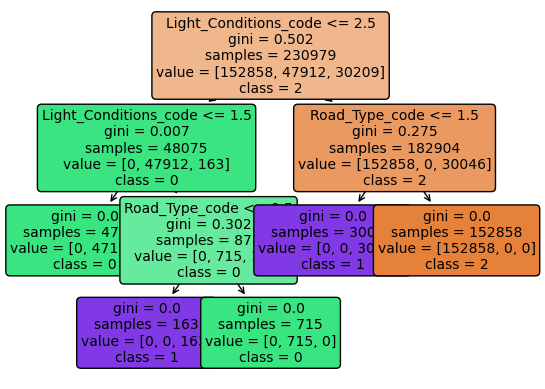

In [47]:
# Decision Tree : Plot [Training Subset] 
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=df_inputs_names, class_names=df_output_labels, rounded=True, filled=True, fontsize=10)
plt.show()


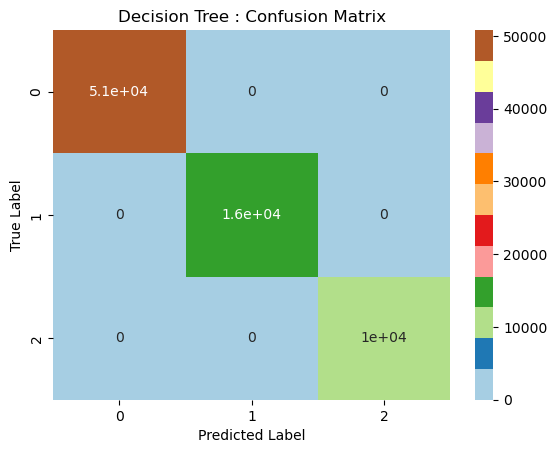

In [48]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(dtc_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()


In [49]:
import time
import psutil  # For memory statistics
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model and measure time
start_time = time.time()
dt_classifier.fit(train_df_inputs, train_df_output)
training_time = time.time() - start_time

# Predict using the trained model and measure time
start_time = time.time()
dt_predictions = dt_classifier.predict(test_df_inputs)
prediction_time = time.time() - start_time

# Measure memory consumption during training and prediction
training_memory = psutil.Process().memory_info().rss
prediction_memory = psutil.Process().memory_info().rss

# Display time statistics
print("Training Time:", training_time)
print("Prediction Time:", prediction_time)

# Display memory statistics
print("Training Memory Consumption:", training_memory)
print("Prediction Memory Consumption:", prediction_memory)


Training Time: 0.544522762298584
Prediction Time: 0.017466306686401367
Training Memory Consumption: 803680256
Prediction Memory Consumption: 803680256


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Reshape target variable y
train_df_output_reshaped = train_df_output.values.ravel()
test_df_output_reshaped = test_df_output.values.ravel()

# Scale input features
scaler = StandardScaler()
train_df_inputs_scaled = scaler.fit_transform(train_df_inputs)
test_df_inputs_scaled = scaler.transform(test_df_inputs)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed

# Train Random Forest classifier
random_forest.fit(train_df_inputs_scaled, train_df_output_reshaped)

# Make predictions
rf_predictions = random_forest.predict(test_df_inputs_scaled)

# Evaluate performance
print("Model: Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(test_df_output_reshaped, rf_predictions))
print("Classification Report:")
print(classification_report(test_df_output_reshaped, rf_predictions))
print("Accuracy:", accuracy_score(test_df_output_reshaped, rf_predictions))


Model: Random Forest
Confusion Matrix:
[[50788     0     0]
 [    0 16037     0]
 [    0     0 10169]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50788
           1       1.00      1.00      1.00     16037
           2       1.00      1.00      1.00     10169

    accuracy                           1.00     76994
   macro avg       1.00      1.00      1.00     76994
weighted avg       1.00      1.00      1.00     76994

Accuracy: 1.0


In [60]:
feature_names = ['Junction_Control_code', 'Junction_Detail_code', 'Light_Conditions_code',
                   'Local_Authority_(District)_code', 'Carriageway_Hazards_code',
                   'Police_Force_code', 'Road_Surface_Conditions_code', 'Road_Type_code',
                   'Urban_or_Rural_Area_code', 'Weather_Conditions_code', 'Vehicle_Type_code',
                    'Day_of_Week_code', 'Accident_Severity_code', 'Latitude_mmnorm',
                   'Longitude_mmnorm', 'Number_of_Casualties_mmnorm', 'Number_of_Vehicles_mmnorm',
                   'Speed_limit']

In [61]:
import pandas as pd

# Get feature importance
feature_importance = random_forest.feature_importances_

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance matrix
print("Feature Importance Matrix:")
print(feature_importance_df)


Feature Importance Matrix:
                            Feature  Importance
2             Light_Conditions_code    0.582483
7                    Road_Type_code    0.324233
17                      Speed_limit    0.058763
8          Urban_or_Rural_Area_code    0.006292
6      Road_Surface_Conditions_code    0.005824
0             Junction_Control_code    0.004756
1              Junction_Detail_code    0.003272
13                  Latitude_mmnorm    0.002688
14                 Longitude_mmnorm    0.002627
9           Weather_Conditions_code    0.001877
3   Local_Authority_(District)_code    0.001471
16        Number_of_Vehicles_mmnorm    0.001433
5                 Police_Force_code    0.001356
11                 Day_of_Week_code    0.001331
15      Number_of_Casualties_mmnorm    0.000567
10                Vehicle_Type_code    0.000547
12           Accident_Severity_code    0.000355
4          Carriageway_Hazards_code    0.000126


In [62]:
print("Length of feature_names:", len(feature_names))
print("Length of feature_importance:", len(feature_importance))


Length of feature_names: 18
Length of feature_importance: 18


In [63]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits (k)

# Perform k-fold cross-validation and get predictions
dtc_cv_predictions = cross_val_predict(dt_classifier, train_df_inputs, train_df_output, cv=k_fold)

# Evaluate performance using confusion matrix and classification report
dtc_cv_conf_mat = confusion_matrix(train_df_output, dtc_cv_predictions)
print("Confusion Matrix (k-fold cross-validation):")
print(dtc_cv_conf_mat)

dtc_cv_perf = classification_report(train_df_output, dtc_cv_predictions)
print("Classification Report (k-fold cross-validation):")
print(dtc_cv_perf)

# Train the Decision Tree model on the entire training set
dt_classifier.fit(train_df_inputs, train_df_output)

# Evaluate performance on the testing set
dtc_test_predictions = dt_classifier.predict(test_df_inputs)

# Evaluate performance using confusion matrix and classification report on testing set
dtc_test_conf_mat = confusion_matrix(test_df_output, dtc_test_predictions)
print("Confusion Matrix (Testing Subset):")
print(dtc_test_conf_mat)

dtc_test_perf = classification_report(test_df_output, dtc_test_predictions)
print("Classification Report (Testing Subset):")
print(dtc_test_perf)


Confusion Matrix (k-fold cross-validation):
[[152858      0      0]
 [     0  47912      0]
 [     0      0  30209]]
Classification Report (k-fold cross-validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152858
           1       1.00      1.00      1.00     47912
           2       1.00      1.00      1.00     30209

    accuracy                           1.00    230979
   macro avg       1.00      1.00      1.00    230979
weighted avg       1.00      1.00      1.00    230979

Confusion Matrix (Testing Subset):
[[50788     0     0]
 [    0 16037     0]
 [    0     0 10169]]
Classification Report (Testing Subset):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50788
           1       1.00      1.00      1.00     16037
           2       1.00      1.00      1.00     10169

    accuracy                           1.00     76994
   macro avg       1.00      1.00      1.0

In [64]:
# Train the Decision Tree model on the entire training set
dt_classifier.fit(train_df_inputs, train_df_output)

# Print feature importance
feature_importance = dt_classifier.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: {importance}")


Feature Importance:
Feature 0: 0.0
Feature 1: 0.0
Feature 2: 0.5645157729516199
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.43548422704838
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.0


In [65]:
# Train the Decision Tree model on the entire training set
dt_classifier.fit(train_df_inputs, train_df_output)

# Get feature names
feature_names = train_df_inputs.columns

# Print feature importance with names
feature_importance = dt_classifier.feature_importances_
print("Feature Importance:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")


Feature Importance:
Junction_Control_code: 0.0
Junction_Detail_code: 0.0
Light_Conditions_code: 0.5645157729516199
Local_Authority_(District)_code: 0.0
Carriageway_Hazards_code: 0.0
Police_Force_code: 0.0
Road_Surface_Conditions_code: 0.0
Road_Type_code: 0.43548422704838
Urban_or_Rural_Area_code: 0.0
Weather_Conditions_code: 0.0
Vehicle_Type_code: 0.0
Day_of_Week_code: 0.0
Accident_Severity_code: 0.0
Latitude_mmnorm: 0.0
Longitude_mmnorm: 0.0
Number_of_Casualties_mmnorm: 0.0
Number_of_Vehicles_mmnorm: 0.0
Speed_limit: 0.0
